In [7]:
pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/advertising.csv')

In [3]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
len(df['Ad Topic Line'].unique())

1000

In [6]:
len(df['City'].unique())

969

In [5]:
len(df['Country'].unique())

237

In [30]:
df['Daily Time Spent on Site'].describe()

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Density'>

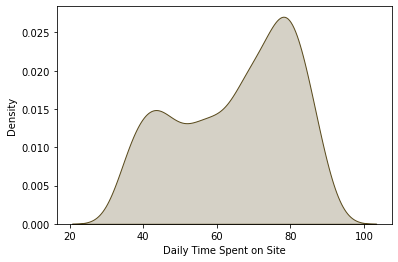

In [36]:
sns.kdeplot(df['Daily Time Spent on Site'], shade=True, color='#594A1C')

In [26]:
tmp = [{'10대':6, '20대':258, '30대':411, '50대':87, '60대':5}]
tmp_df = pd.DataFrame(tmp)

tmp_df

,10대,20대,30대,50대,60대
0,6,258,411,87,5


In [31]:
df['Area Income'].describe()

count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area Income, dtype: float64

<AxesSubplot:xlabel='Area Income', ylabel='Density'>

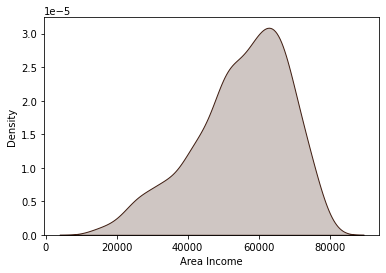

In [40]:
sns.kdeplot(df['Area Income'], shade=True, color='#401E12')

In [32]:
df['Daily Internet Usage'].describe()

count    1000.000000
mean      180.000100
std        43.902339
min       104.780000
25%       138.830000
50%       183.130000
75%       218.792500
max       269.960000
Name: Daily Internet Usage, dtype: float64

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Density'>

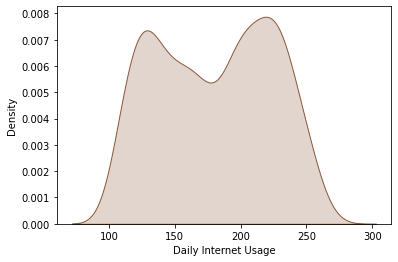

In [41]:
sns.kdeplot(df['Daily Internet Usage'], shade=True, color='#8C583A')

In [89]:
# 클릭=1 클릭=0 분리

df_click1 = df[df['Clicked on Ad'] == 1]
df_click0 = df[df['Clicked on Ad'] == 0]

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Density'>

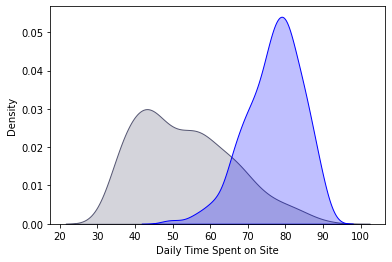

In [79]:
sns.kdeplot(df_click1['Daily Time Spent on Site'], shade=True, color='#565773')
sns.kdeplot(df_click0['Daily Time Spent on Site'], shade=True, color='blue')

<AxesSubplot:xlabel='Area Income', ylabel='Density'>

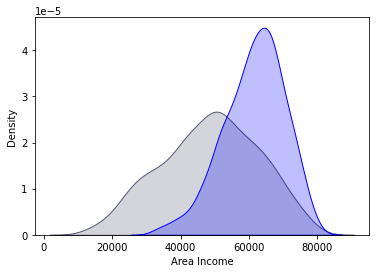

In [74]:
sns.kdeplot(df_click1['Area Income'], shade=True, color='#565773')
sns.kdeplot(df_click0['Area Income'], shade=True, color='blue')

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Density'>

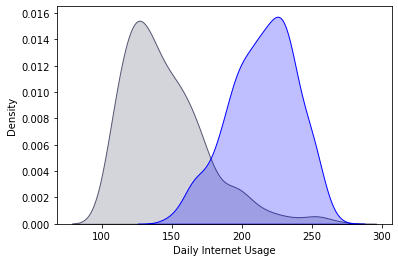

In [81]:
sns.kdeplot(df_click1['Daily Internet Usage'], shade=True, color='#565773')
sns.kdeplot(df_click0['Daily Internet Usage'], shade=True, color='blue')

In [64]:
from scipy import stats

In [67]:
stats.pointbiserialr(df['Daily Time Spent on Site'], df['Clicked on Ad'])

PointbiserialrResult(correlation=0.4925312655560378, pvalue=3.1298083092889973e-62)

In [68]:
stats.pointbiserialr(df['Area Income'], df['Clicked on Ad'])

PointbiserialrResult(correlation=-0.4762546275321446, pvalue=9.449583412824246e-58)

In [69]:
stats.pointbiserialr(df['Daily Internet Usage'], df['Clicked on Ad'])

PointbiserialrResult(correlation=-0.7865391758714898, pvalue=3.893234122541571e-211)

In [93]:
df['Timestamp']

0       2016-03-27 0:53
1       2016-04-04 1:39
2      2016-03-13 20:35
3       2016-01-10 2:31
4       2016-06-03 3:36
             ...       
995    2016-02-11 21:49
996     2016-04-22 2:07
997    2016-02-01 17:24
998     2016-03-24 2:35
999    2016-06-03 21:43
Name: Timestamp, Length: 1000, dtype: object

In [95]:
df_pre = pd.read_csv('./data/advertising_pre2.csv')
df_pre

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,region,region_incomeLevel,month,day,hour,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,Middle East & North Africa,Lower middle income,3,27,0,0
1,80.23,31,68441.85,193.77,1,Nauru,East Asia & Pacific,High income,4,4,1,0
2,69.47,26,59785.94,236.50,0,San Marino,Europe & Central Asia,High income,3,13,20,0
3,74.15,29,54806.18,245.89,1,Italy,Europe & Central Asia,High income,1,10,2,0
4,68.37,35,73889.99,225.58,0,Iceland,Europe & Central Asia,High income,6,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,Lebanon,Middle East & North Africa,Upper middle income,2,11,21,1
996,51.30,45,67782.17,134.42,1,Bosnia and Herzegovina,Europe & Central Asia,Upper middle income,4,22,2,1
997,51.63,51,42415.72,120.37,1,Mongolia,East Asia & Pacific,Lower middle income,2,1,17,1
998,55.55,19,41920.79,187.95,0,Guatemala,Latin America & Caribbean,Upper middle income,3,24,2,0


In [100]:
pd.DataFrame(df['Timestamp'])

,Timestamp
0,2016-03-27 0:53
1,2016-04-04 1:39
2,2016-03-13 20:35
3,2016-01-10 2:31
4,2016-06-03 3:36
...,...
995,2016-02-11 21:49
996,2016-04-22 2:07
997,2016-02-01 17:24
998,2016-03-24 2:35


In [96]:
df_pre[['month', 'day', 'hour']]

,month,day,hour
0,3,27,0
1,4,4,1
2,3,13,20
3,1,10,2
4,6,3,3
...,...,...,...
995,2,11,21
996,4,22,2
997,2,1,17
998,3,24,2


In [98]:
pd.DataFrame(df_pre['Country'])

,Country
0,Tunisia
1,Nauru
2,San Marino
3,Italy
4,Iceland
...,...
995,Lebanon
996,Bosnia and Herzegovina
997,Mongolia
998,Guatemala


In [101]:
df_pre[['region', 'region_incomeLevel']]

,region,region_incomeLevel
0,Middle East & North Africa,Lower middle income
1,East Asia & Pacific,High income
2,Europe & Central Asia,High income
3,Europe & Central Asia,High income
4,Europe & Central Asia,High income
...,...,...
995,Middle East & North Africa,Upper middle income
996,Europe & Central Asia,Upper middle income
997,East Asia & Pacific,Lower middle income
998,Latin America & Caribbean,Upper middle income
